In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os


class RamanSpectrum:
    def __init__(self, filepath):
        # Read in the data from the file
        with open(filepath, 'r', encoding='iso-8859-1') as f:
            lines = f.readlines()
        
        # Extract the metadata from the file
        metadata = {}
        for line in lines:
        
            if line.startswith("#"):
                # Storing the metadata
                key, value = line.strip().split("=")
                metadata[key[1:]] = value.replace('\t', '')
        # Now that we have the metadata stored in a dictionary, we can
        # store the value of the keys in a set of strings

        self.metakeys = metadata.keys()
        
        # Extract the x and y data from the file
        data = np.loadtxt(lines[len(metadata):])
        self.x = data[:,0]
        self.y = data[:,1]
        
        # Store the metadata as object attributes
        self.metadata = metadata
    
    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("Wavenumber (cm$^{-1}$)")
        plt.ylabel("Intensity (counts)")
        plt.show()

In [9]:
path = "raman_2/"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(r+'/'+file)

print(files)

['raman_2//Si_nano_muestra 3_25.txt', 'raman_2//Si_nano_muestra 3_16.txt', 'raman_2//Si_nano_muestra 3_63.txt', 'raman_2//Si_nano_muestra 3_01.txt', 'raman_2//Si_nano_muestra 3_64.txt', 'raman_2//Si_nano_muestra 3_31.txt', 'raman_2//Si_nano_muestra 3_46.txt', 'raman_2//Si_nano_muestra 3_59.txt', 'raman_2//Si_nano_muestra 3_57.txt', 'raman_2//Si_nano_muestra 3_38.txt', 'raman_2//Si_nano_muestra 3_62.txt', 'raman_2//Si_nano_muestra 3_48.txt', 'raman_2//Si_nano_muestra 3_37.txt', 'raman_2//Si_nano_muestra 3_34.txt', 'raman_2//Si_nano_muestra 3_33.txt', 'raman_2//Si_nano_muestra 3_17.txt', 'raman_2//Si_nano_muestra 3_65.txt', 'raman_2//Si_nano_muestra 3_52.txt', 'raman_2//Si_nano_muestra 3_32.txt', 'raman_2//Si_nano_muestra 3_60.txt']


In [10]:
information = []

spectrum = RamanSpectrum(files[0])

spectrum.metadata

{'Acq. time (s)': '10',
 'Accumulations': '2',
 'Range (cm-¹)': '100...1000',
 'Windows': '1',
 'Autofocus': 'Off',
 'AutoExposure': 'Off',
 'Spike filter': 'Multiple accum.',
 'Delay time (s)': '0',
 'Binning': '1',
 'Readout mode': 'Signal',
 'DeNoise': 'Off',
 'ICS correction': 'Off',
 'Dark correction': 'Off',
 'Inst. Process': 'Off',
 'Instrument': 'LabRAM HR Evol',
 'Detector': 'Syncerity OE',
 'Objective': 'x100_VIS_LWD',
 'Grating': '600 (500nm)',
 'ND Filter': '50%',
 'Laser': '633nm_Edge',
 'Hole': '70.0087',
 'Range': 'Visible',
 'Project': 'Omar',
 'Sample': 'Si_Nano',
 'Site': '21_03_2023',
 'Title': 'Si_nano_muestra 3',
 'Remark': '',
 'Date': '21.03.2023 10:57',
 'Acquired': '21.03.2023 10:57:45'}

In [11]:
print(spectrum.metakeys)

dict_keys(['Acq. time (s)', 'Accumulations', 'Range (cm-¹)', 'Windows', 'Autofocus', 'AutoExposure', 'Spike filter', 'Delay time (s)', 'Binning', 'Readout mode', 'DeNoise', 'ICS correction', 'Dark correction', 'Inst. Process', 'Instrument', 'Detector', 'Objective', 'Grating', 'ND Filter', 'Laser', 'Hole', 'Range', 'Project', 'Sample', 'Site', 'Title', 'Remark', 'Date', 'Acquired'])


In [13]:
type(spectrum.metakeys)

dict_keys

In [33]:
import re

information = []

spectrum = RamanSpectrum(files[0])
keys = spectrum.metakeys

def acces_value(pattern, dict_keys_obj):
        matched_keys = set()
        regex = re.compile(pattern, re.IGNORECASE)

        for key in dict_keys_obj:
            if regex.search(key):
                matched_keys.add(key)
        print(matched_keys)
        return matched_keys

{'Laser'}

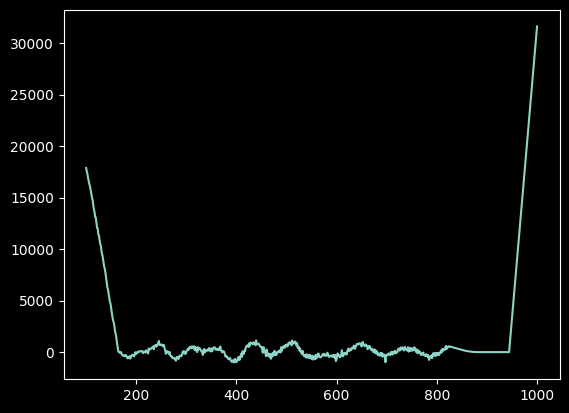

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def estimate_baseline(y, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return baseline

xx, yy = spectrum.x, spectrum.y - estimate_baseline(spectrum.y)

plt.plot(xx, yy)

